# PA3c: Text classification (Part C)

Alfred Karlsson and Arvid Nyberg

In [141]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [142]:
# Single annotated test data
test_data = pd.read_csv("PA3_test.csv")

# Double annotated train data
train_data_1 = pd.read_csv("PA3_train.csv")

# Triple annotated train data with more samples
train_data_2 = pd.read_csv("PA3_train_final.csv")

# Extracting only the text from the double annotated train data
train_text_1 = train_data_1.iloc[:, 1]
# Formatting the target data such that if the given data differs mark the given data as -1
train_target = train_data_1.iloc[:,0]
train_target = train_target.str.split('/',expand=True)
train_target_combined = pd.to_numeric(np.where(train_target[0] == train_target[1], train_target[0], -1))

# Format the triple annotated data
train_text_2 = train_data_2.iloc[:,1]
# Combining target data to one column
train_target_2 = train_data_2.iloc[:,0]
train_target_2 = train_target_2.str.split('/',expand=True)
train_target_2['combined'] = np.where(train_target_2[0] == train_target_2[1], train_target_2[0], -1)
train_target_2['combined'] = pd.to_numeric(np.where(train_target_2['combined'] == train_target_2[2], train_target_2[0], -1))
# The first annotation can be seen as more correct since it is already based on the other two annotations
train_target_2['best'] = pd.to_numeric(train_target_2[0])

# Separating the test data to text and target
test_text = test_data.iloc[:,1]
test_target = test_data.iloc[:,0]



Training models on the given data

In [143]:
result = []
result_combined = []
result_final = []

# Training and testing the model with different alpha values
for i in range (1, 50):
    alpha = i/10
    text_clf = Pipeline([
                ('tfidfvect', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB(alpha = alpha)) 
                ])
    text_clf.fit(train_text_1, train_target_combined)
    result.append((alpha,text_clf.score(test_text, test_target)))
    text_clf.fit(train_text_2,train_target_2['combined'])
    result_combined.append((alpha, text_clf.score(test_text, test_target)))
    text_clf.fit(train_text_2,train_target_2['best'])
    result_final.append((alpha, text_clf.score(test_text, test_target)))

In [151]:
# Evaluating the model with different alpha values
max_accuracy = 0
best_alpha = 0
for alpha, accuracy in result_final:
    if(accuracy>=max_accuracy):
        max_accuracy = accuracy
        best_alpha = alpha
    
print(f"Highest accuracy with human marking: {max_accuracy}")
print(f"alpha: {best_alpha}")

Highest accuracy with human marking: 0.9462857142857143
alpha: 1.1


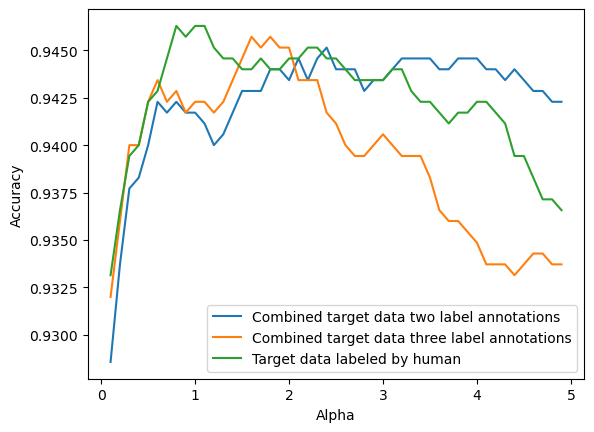

In [ ]:
# Plotting the results
plt.plot(*zip(*result),label='Combined target data two label annotations')
plt.plot(*zip(*result_combined), label='Combined target data three label annotations')
plt.plot(*zip(*result_final),label='Target data labeled by human' )
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()